In [1]:
import numpy as np
from astropy.table import Table, hstack
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
from astropy.io import fits
import matplotlib.gridspec as gridspec
import spectres
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import pandas as pd
import glob
from scipy.optimize import curve_fit
from scipy import stats
import wquantiles as wq
import weightedstats as ws

## Importing data table

In [2]:
data = Table.read('/Users/apple/Documents/MS Thesis/manga17_dl_salim_with_weights.fits')
data = data[data['ESWEIGHT'] > -999]
data 

CATALOG_RA,CATALOG_DEC,NSA_Z,NSA_ZDIST,NSA_ELPETRO_MASS,NSA_ELPETRO_ABSMAG [7],NSA_ELPETRO_AMIVAR [7],NSA_ELPETRO_FLUX [7],NSA_ELPETRO_FLUX_IVAR [7],NSA_ELPETRO_TH50_R,NSA_ELPETRO_TH50 [7],NSA_ELPETRO_PHI,NSA_ELPETRO_BA,NSA_SERSIC_MASS,NSA_SERSIC_ABSMAG [7],NSA_SERSIC_AMIVAR [7],NSA_SERSIC_FLUX [7],NSA_SERSIC_FLUX_IVAR [7],NSA_SERSIC_TH50,NSA_SERSIC_PHI,NSA_SERSIC_BA,NSA_SERSIC_N,NSA_PETRO_FLUX [7],NSA_PETRO_FLUX_IVAR [7],NSA_PETRO_TH50,NSA_EXTINCTION [7],NSA_IAUNAME,NSA_SUBDIR,NSA_PID,NSA_NSAID_1,CATIND,MANGA_TARGET1,MANGAID_1,ZMIN,ZMAX,SZMIN,SZMAX,EZMIN,EZMAX,PROBS,PWEIGHT,SWEIGHT,SRWEIGHT,EWEIGHT,PSRWEIGHT,ESRWEIGHT,PSWEIGHT,ESWEIGHT,RANFLAG,MANGA_TILEIDS [30],MANGA_TILEID,TILERA,TILEDEC,IFUTARGETSIZE,IFUDESIGNSIZE,IFUDESIGNWRONGSIZE,IFU_RA,IFU_DEC,BADPHOTFLAG,STARFLAG,OBJECT_RA,OBJECT_DEC,OBSFLAG,CATINDANC,IFUDESIGNSIZEMAIN,IFUMINSIZEANC,IFUTARGSIZEANC,MANGA_TARGET3,PRIORITYANC,UNALLOC,name,plate,ifudsgn,plateifu_1,mangaid_2,objra,objdec,log_SFR_Ha,FoV,Re_kpc,e_log_Mass,e_log_SFR_Ha,log_Mass,log_SFR_ssp,log_NII_Ha_cen,e_log_NII_Ha_cen,log_OIII_Hb_cen,e_log_OIII_Hb_cen,log_SII_Ha_cen,e_log_SII_Ha_cen,log_OII_Hb_cen,e_log_OII_Hb_cen,EW_Ha_cen,e_EW_Ha_cen,ZH_LW_Re_fit,e_ZH_LW_Re_fit,alpha_ZH_LW_Re_fit,e_alpha_ZH_LW_Re_fit,ZH_MW_Re_fit,e_ZH_MW_Re_fit,alpha_ZH_MW_Re_fit,e_alpha_ZH_MW_Re_fit,Age_LW_Re_fit,e_Age_LW_Re_fit,alpha_Age_LW_Re_fit,e_alpha_Age_LW_Re_fit,Age_MW_Re_fit,e_Age_MW_Re_fit,alpha_Age_MW_Re_fit,e_alpha_Age_MW_Re_fit,Re_arc,DL,DA,PA,ellip,log_Mass_gas,vel_sigma_Re,e_vel_sigma_Re,log_SFR_SF,log_SFR_D_C,OH_O3N2_cen,e_OH_O3N2_cen,OH_N2_cen,e_OH_N2_cen,OH_ONS_cen,e_OH_ONS_cen,OH_R23_cen,e_OH_R23_cen,OH_pyqz_cen,e_OH_pyqz_cen,OH_t2_cen,e_OH_t2_cen,OH_M08_cen,e_OH_M08_cen,OH_T04_cen,e_OH_T04_cen,OH_dop_cen,e_OH_dop_cen,OH_O3N2_EPM09_cen,e_OH_O3N2_EPM09_cen,log_OI_Ha_cen,e_log_OI_Ha_cen,Ha_Hb_cen,e_Ha_Hb_cen,log_NII_Ha_Re,e_log_NII_Ha_Re,log_OIII_Hb_Re,e_log_OIII_Hb_Re,log_SII_Ha_Re,e_log_SII_Ha_Re,log_OII_Hb_Re,e_log_OII_Hb_Re,log_OI_Ha_Re,e_log_OI_Ha_Re,EW_Ha_Re,e_EW_Ha_Re,Ha_Hb_Re,e_Ha_Hb_Re,log_NII_Ha_ALL,e_log_NII_Ha_ALL,log_OIII_Hb_ALL,e_log_OIII_Hb_ALL,log_SII_Ha_ALL,e_log_SII_Ha_ALL,log_OII_Hb_ALL,e_log_OII_Hb_ALL,log_OI_Ha_ALL,e_log_OI_Ha_ALL,EW_Ha_ALL,e_EW_Ha_ALL,Ha_Hb_ALL,Sigma_Mass_cen,e_Sigma_Mass_cen,Sigma_Mass_Re,e_Sigma_Mass_Re,Sigma_Mass_ALL,e_Sigma_Mass_ALL,T30,ZH_T30,ZH_Re_T30,a_ZH_T30,T40,ZH_T40,ZH_Re_T40,a_ZH_T40,T50,ZH_T50,ZH_Re_T50,a_ZH_T50,T60,ZH_T60,ZH_Re_T60,a_ZH_T60,T70,ZH_T70,ZH_Re_T70,a_ZH_T70,T80,ZH_T80,ZH_Re_T80,a_ZH_T80,T90,ZH_T90,ZH_Re_T90,a_ZH_T90,T95,ZH_T95,ZH_Re_T95,a_ZH_T95,T99,ZH_T99,ZH_Re_T99,a_ZH_T99,log_Mass_gas_Av_gas_OH,log_Mass_gas_Av_ssp_OH,vel_ssp_2,e_vel_ssp_2,vel_Ha_2,e_vel_Ha_2,vel_ssp_1,e_vel_ssp_1,vel_Ha_1,e_vel_Ha_1,log_SFR_ssp_100Myr,log_SFR_ssp_10Myr,vel_disp_Ha_cen,vel_disp_ssp_cen,vel_disp_Ha_1Re,vel_disp_ssp_1Re,log_Mass_in_Re,ML_int,ML_avg,F_Ha_cen,e_F_Ha_cen,R50_kpc_V,e_R50_kpc_V,R50_kpc_Mass,e_R50_kpc_Mass,log_Mass_corr_in_R50_V,e_log_Mass_corr_in_R50_V,log_Mass_gas_Av_gas_log_log,Av_gas_Re,e_Av_gas_Re,Av_ssp_Re,e_Av_ssp_Re,Lambda_Re,e_Lambda_Re,nsa_redshift,nsa_mstar,nsa_inclination,flux_[OII]3726.03_Re_fit,e_flux_[OII]3726.03_Re_fit,flux_[OII]3726.03_alpha_fit,e_flux_[OII]3726.03_alpha_fit,flux_[OII]3728.82_Re_fit,e_flux_[OII]3728.82_Re_fit,flux_[OII]3728.82_alpha_fit,e_flux_[OII]3728.82_alpha_fit,flux_HI3734.37_Re_fit,e_flux_HI3734.37_Re_fit,flux_HI3734.37_alpha_fit,e_flux_HI3734.37_alpha_fit,flux_HI3797.9_Re_fit,e_flux_HI3797.9_Re_fit,flux_HI3797.9_alpha_fit,e_flux_HI3797.9_alpha_fit,flux_HeI3888.65_Re_fit,e_flux_HeI3888.65_Re_fit,flux_HeI3888.65_alpha_fit,e_flux_HeI3888.65_alpha_fit,flux_HI3889.05_Re_fit,e_flux_HI3889.05_Re_fit,flux_HI3889.05_alpha_fit,e_flux_HI3889.05_alpha_fit,flux_HeI3964.73_Re_fit,e_flux_HeI3964.73_Re_fit,flux_HeI3964.73_alpha_fit,e_flux_HeI3964.73_alpha_fit,flux_[NeIII]3967.46_Re_fit,e_flux_[NeIII]3967.46_Re_fit,flux_[NeIII]3967.46_alpha_fit,e_flux_[NeIII]3967.46_alpha_fit,flux_CaII3968.47_Re_fit,e_flux_CaII3968.47_Re_fit,flux_CaII396

In [3]:
#data = data[data != -99]
#data

In [4]:
sfr = data['col12']
mass = data['col10']
lambda_re = data['Lambda_Re']
ssfr = sfr - mass
lw_age = data['Age_LW_Re_fit']
mw_age = data['Age_MW_Re_fit']
data['ssfr'] = ssfr
ttype = data['T-Type']
ellip = data['NSA_ELPETRO_BA']

In [5]:
etg_data = data[data['T-Type'] <= 0]
ltg_data = data[data['T-Type'] > 0]

In [6]:
#ETG
etg_sfr = etg_data['col12']
etg_mass = etg_data['col10']
etg_lambda_re = etg_data['Lambda_Re']
etg_ssfr = etg_data['ssfr']
etg_lw_age = etg_data['Age_LW_Re_fit']
etg_mw_age = etg_data['Age_MW_Re_fit']
etg_ttype = etg_data['T-Type']

In [7]:
#LTG
ltg_sfr = ltg_data['col12']
ltg_mass = ltg_data['col10']
ltg_lambda_re = ltg_data['Lambda_Re']
ltg_ssfr = ltg_data['ssfr']
ltg_lw_age = ltg_data['Age_LW_Re_fit']
ltg_mw_age = ltg_data['Age_MW_Re_fit']
ltg_ttype = ltg_data['T-Type']

## Lambda inclination corrected

In [8]:
q = 0.2
beta = 0.3
cos_inc = np.sqrt((((ellip)**2)- (q**2))/(1 - q**2))
inc  = np.arccos(cos_inc)
sin_inc = np.sin(inc)
C = sin_inc / np.sqrt(1 - beta*(cos_inc**2))
lambda_deproj = lambda_re / np.sqrt((C**2) - (lambda_re**2)*((C**2) - 1))
data['lambda_deproj'] = lambda_deproj

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sin
  """


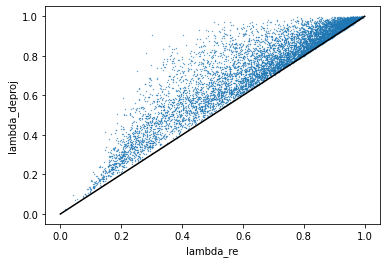

In [127]:
plt.scatter(lambda_re, lambda_deproj, s =0.1)
plt.xlabel('lambda_re')
plt.ylabel('lambda_deproj')
plt.plot([0,1],[0,1], color = 'black')


### Mass separated

In [10]:
lm_etg_sfr = etg_sfr[etg_mass < 10.5]
hm_etg_sfr = etg_sfr[etg_mass > 10.5]

8.311 11.975
8.255 11.884


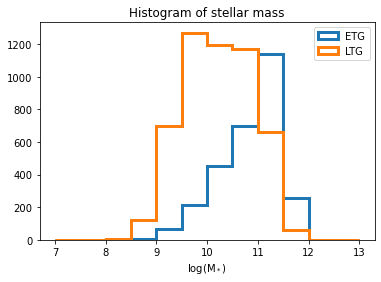

In [11]:
bins = np.linspace(7,13, 13)
plt.title('Histogram of stellar mass')
plt.xlabel(r'log(M$_*$)')
plt.hist(etg_mass, bins = bins, histtype = 'step', linewidth = 3, label = 'ETG')
plt.hist(ltg_mass, bins = bins, histtype = 'step', linewidth = 3, label = 'LTG')

plt.legend()

print(etg_mass[etg_mass >= 0].min(), etg_mass[etg_mass >= 0].max())
print(ltg_mass[ltg_mass >= 0].min(), ltg_mass[ltg_mass >= 0].max())

In [12]:
#Low mass early type
lm_etg_sfr = etg_sfr[etg_mass < 10.5]
lm_etg_lambda_re = etg_lambda_re[etg_mass < 10.5]
lm_etg_mass = etg_mass[etg_mass < 10.5]
lm_etg_ssfr = etg_ssfr[etg_mass < 10.5]
lm_etg_lw_age = etg_lw_age[etg_mass < 10.5]
lm_etg_mw_age = etg_mw_age[etg_mass < 10.5]

In [13]:
#high mass early type
hm_etg_sfr = etg_sfr[etg_mass > 10.5]
hm_etg_lambda_re = etg_lambda_re[etg_mass > 10.5]
hm_etg_mass = etg_mass[etg_mass > 10.5]
hm_etg_ssfr = etg_ssfr[etg_mass > 10.5]
hm_etg_lw_age = etg_lw_age[etg_mass > 10.5]
hm_etg_mw_age = etg_mw_age[etg_mass > 10.5]

In [14]:
#Low mass late type
lm_ltg_sfr = ltg_sfr[ltg_mass < 10.5]
lm_ltg_lambda_re = ltg_lambda_re[ltg_mass < 10.5]
lm_ltg_mass = ltg_mass[ltg_mass < 10.5]
lm_ltg_ssfr = ltg_ssfr[ltg_mass < 10.5]
lm_ltg_lw_age = ltg_lw_age[ltg_mass < 10.5]
lm_ltg_mw_age = ltg_mw_age[ltg_mass < 10.5]

In [15]:
#High mass late type
hm_ltg_sfr = ltg_sfr[ltg_mass > 10.5]
hm_ltg_lambda_re = ltg_lambda_re[ltg_mass > 10.5]
hm_ltg_mass = ltg_mass[ltg_mass > 10.5]
hm_ltg_ssfr = ltg_sfr[ltg_mass > 10.5]
hm_ltg_lw_age = ltg_lw_age[ltg_mass > 10.5]
hm_ltg_mw_age = ltg_mw_age[ltg_mass > 10.5]

## SFR and sSFR vs mass Plots

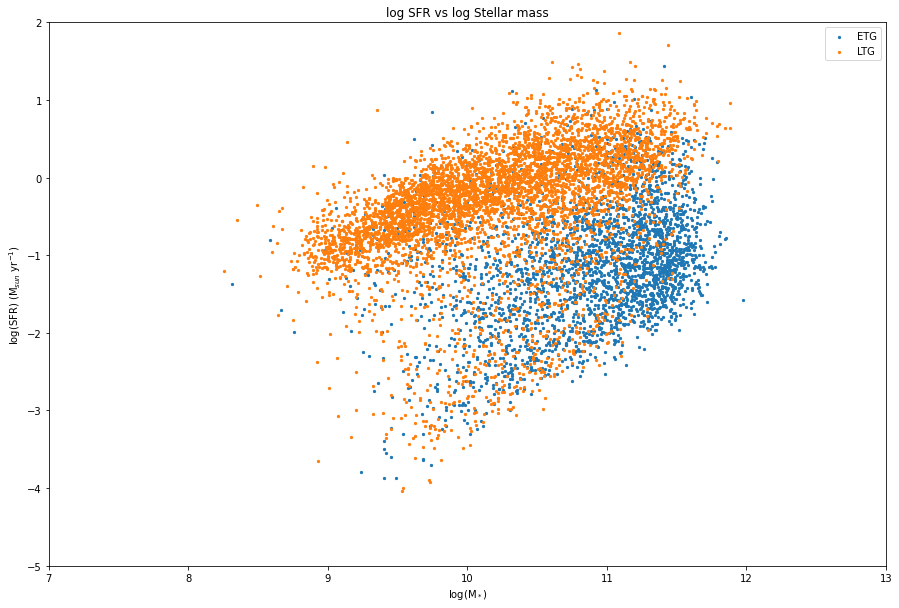

In [16]:
plt.figure(figsize = (15,10))
plt.title('log SFR vs log Stellar mass')
plt.scatter(etg_mass, etg_sfr, s = 5, label = 'ETG')
plt.scatter(ltg_mass, ltg_sfr, s = 5, label = 'LTG')

plt.xlim(7,13)
plt.ylim(-5,2)

plt.xlabel(r'log(M$_*$)')
plt.ylabel(r'log(SFR) (M$_{sun}$ yr$^{-1}$)')

plt.legend()
plt.show()

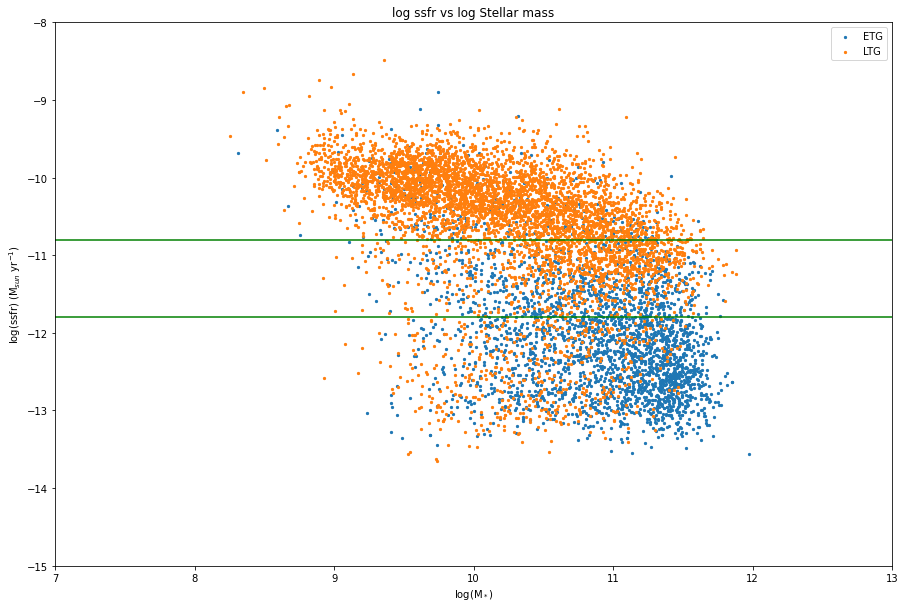

In [17]:
plt.figure(figsize = (15,10))
plt.title('log ssfr vs log Stellar mass')
plt.scatter(etg_mass, etg_ssfr, s = 5, label = 'ETG')
plt.scatter(ltg_mass, ltg_ssfr, s = 5, label = 'LTG')

plt.xlim(7,13)
plt.ylim(-15,-8)

plt.axhline(-10.8, color = 'green')
plt.axhline(-11.8, color = 'green')

plt.xlabel(r'log(M$_*$)')
plt.ylabel(r'log(ssfr) (M$_{sun}$ yr$^{-1}$)')

plt.legend()
plt.show()

## Age plot

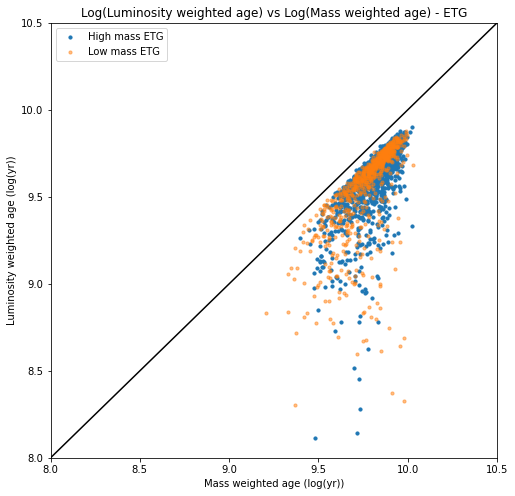

In [18]:
plt.figure(figsize = (8,8))
plt.title('Log(Luminosity weighted age) vs Log(Mass weighted age) - ETG')
#plt.scatter(etg_mw_age, etg_lw_age, s = 5, label = 'ETG')
plt.scatter(hm_etg_mw_age, hm_etg_lw_age, s = 10, label = 'High mass ETG')
plt.scatter(lm_etg_mw_age, lm_etg_lw_age, s = 10, label = 'Low mass ETG', alpha = 0.5)

#plt.scatter(ltg_mw_age, ltg_lw_age, s = 5, label = 'LTG')
x = range(8,13)
plt.plot(x, x, color = 'black')

plt.ylim(8,10.5)
plt.xlim(8,10.5)

plt.ylabel(r'Luminosity weighted age (log(yr))')
plt.xlabel(r'Mass weighted age (log(yr))')

plt.legend()
plt.show()

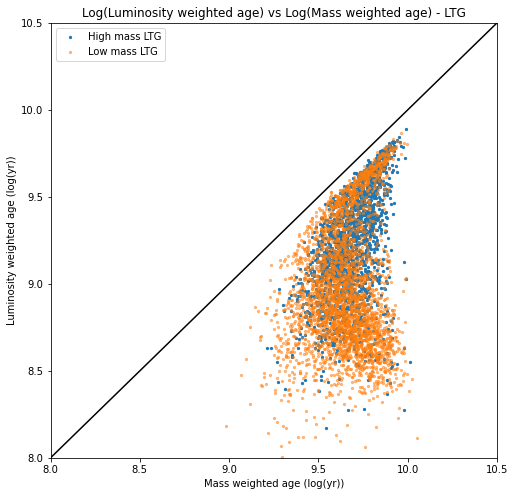

In [19]:
plt.figure(figsize = (8,8))
plt.title('Log(Luminosity weighted age) vs Log(Mass weighted age) - LTG')
#plt.scatter(etg_mw_age, etg_lw_age, s = 5, label = 'ETG')
#plt.scatter(ltg_mw_age, ltg_lw_age, s = 5, label = 'LTG')

plt.scatter(hm_ltg_mw_age, hm_ltg_lw_age, s = 5, label = 'High mass LTG')
plt.scatter(lm_ltg_mw_age, lm_ltg_lw_age, s = 5, label = 'Low mass LTG', alpha = 0.5)
x = range(8,13)
plt.plot(x, x, color = 'black')

plt.ylim(8,10.5)
plt.xlim(8,10.5)

plt.ylabel(r'Luminosity weighted age (log(yr))')
plt.xlabel(r'Mass weighted age (log(yr))')

plt.legend()
plt.show()

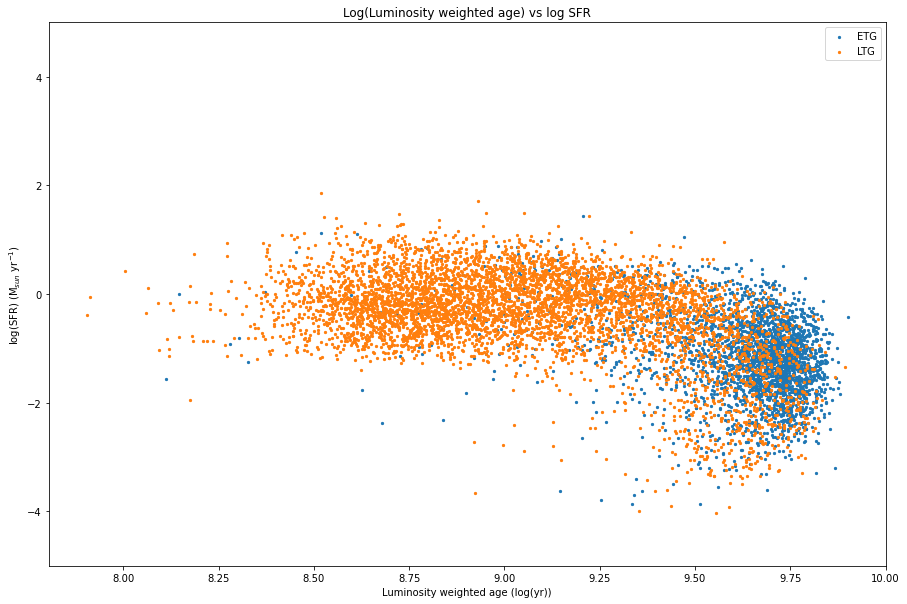

In [20]:
plt.figure(figsize = (15,10))
plt.title('Log(Luminosity weighted age) vs log SFR')
plt.scatter(etg_lw_age, etg_sfr, s = 5, label = 'ETG')
plt.scatter(ltg_lw_age, ltg_sfr, s = 5, label = 'LTG')

#plt.xlim(0,20)
plt.ylim(-5,5)

plt.ylabel(r'log(SFR) (M$_{sun}$ yr$^{-1}$)')
plt.xlabel(r'Luminosity weighted age (log(yr))')

plt.legend()
plt.show()

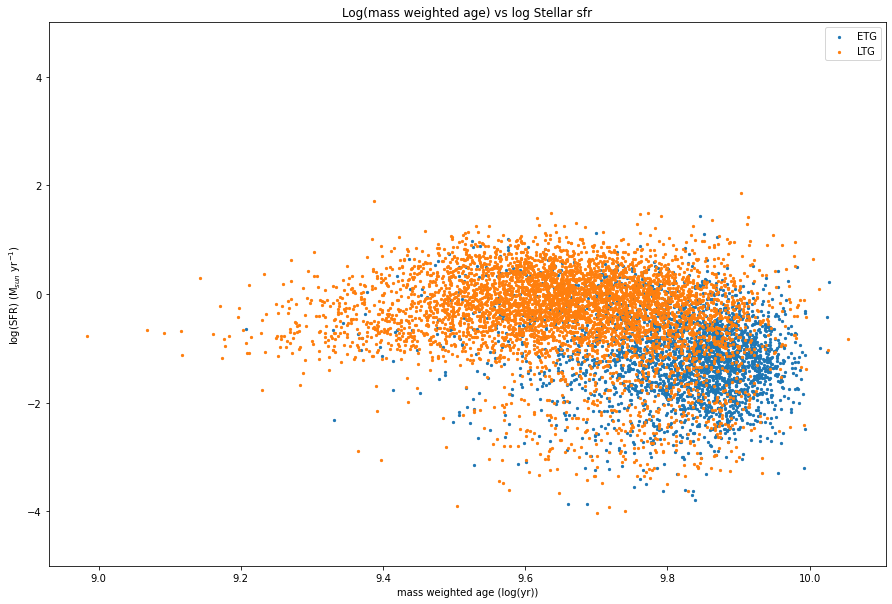

In [21]:
plt.figure(figsize = (15,10))
plt.title('Log(mass weighted age) vs log Stellar sfr')
plt.scatter(etg_mw_age, etg_sfr, s = 5, label = 'ETG')
plt.scatter(ltg_mw_age, ltg_sfr, s = 5, label = 'LTG')

plt.ylim(-5,5)
#plt.xlim(7.5,10.5)

plt.ylabel(r'log(SFR) (M$_{sun}$ yr$^{-1}$)')
plt.xlabel(r'mass weighted age (log(yr))')

plt.legend()
plt.show()

# Star forming, green valley and Quenched

In [22]:
data_sf = data[ssfr > -10.8]
data_gv = data[(ssfr <= -10.8) & (ssfr > -11.8)]
data_qg = data[ssfr <= -11.8]
print('Star forming galaxies = '+str(len(data_sf)))
print('Green valley galaxies = '+str(len(data_gv)))
print('Quenched galaxies = '+str(len(data_qg)))

Star forming galaxies = 3940
Green valley galaxies = 1792
Quenched galaxies = 2287


In [23]:
etg_data_sf = etg_data[etg_ssfr > -10.8]
etg_data_gv = etg_data[(etg_ssfr <= -10.8) & (etg_ssfr > -11.8)]
etg_data_qg = etg_data[etg_ssfr <= -11.8]
print('Star forming ETgalaxies = '+str(len(etg_data_sf)))
print('Green valley ETgalaxies = '+str(len(etg_data_gv)))
print('Quenched ETgalaxies = '+str(len(etg_data_qg)))

Star forming ETgalaxies = 265
Green valley ETgalaxies = 764
Quenched ETgalaxies = 1806


In [24]:
ltg_data_sf = ltg_data[ltg_ssfr > -10.8]
ltg_data_gv = ltg_data[(ltg_ssfr <= -10.8) & (ltg_ssfr > -11.8)]
ltg_data_qg = ltg_data[ltg_ssfr <= -11.8]
print('Star forming LTgalaxies = '+str(len(ltg_data_sf)))
print('Green valley LTgalaxies = '+str(len(ltg_data_gv)))
print('Quenched LTgalaxies = '+str(len(ltg_data_qg)))

Star forming LTgalaxies = 3675
Green valley LTgalaxies = 1028
Quenched LTgalaxies = 481


# T-type plots

In [25]:
"""
plt.title('Histogram of TType')
plt.xlabel('TTYPE')
plt.hist(data['T-Type'], bins = range(-7,11), histtype = 'step', linewidth = 3, label = 'T-type')
plt.hist(etg_data['T-Type'], bins = range(-7,11), histtype = 'step', linewidth = 3, label = 'ETG T-type')
plt.hist(ltg_data['T-Type'], bins = range(-7,11), histtype = 'step', linewidth = 3, label = 'LTG T-type')


plt.legend()
"""

"\nplt.title('Histogram of TType')\nplt.xlabel('TTYPE')\nplt.hist(data['T-Type'], bins = range(-7,11), histtype = 'step', linewidth = 3, label = 'T-type')\nplt.hist(etg_data['T-Type'], bins = range(-7,11), histtype = 'step', linewidth = 3, label = 'ETG T-type')\nplt.hist(ltg_data['T-Type'], bins = range(-7,11), histtype = 'step', linewidth = 3, label = 'LTG T-type')\n\n\nplt.legend()\n"

# 2D histogram - no of galaxies 

## Including weights

In [26]:
weights = data['ESWEIGHT']
#act_sfr = np.exp(sfr)
#act_mass = np.exp(mass)

In [27]:
"""
weights = data['ESWEIGHT']
weight100 = weights*100
weight_int = weight100.astype('int')

weight_mass = np.repeat(mass, weight_int)
weight_sfr = np.repeat(sfr, weight_int)
weight_lambda_re = np.repeat(lambda_re, weight_int)
weight_lw_age = np.repeat(lw_age, weight_int)
weight_mw_age = np.repeat(mw_age, weight_int)
weight_ttype = np.repeat(ttype, weight_int)
"""

"\nweights = data['ESWEIGHT']\nweight100 = weights*100\nweight_int = weight100.astype('int')\n\nweight_mass = np.repeat(mass, weight_int)\nweight_sfr = np.repeat(sfr, weight_int)\nweight_lambda_re = np.repeat(lambda_re, weight_int)\nweight_lw_age = np.repeat(lw_age, weight_int)\nweight_mw_age = np.repeat(mw_age, weight_int)\nweight_ttype = np.repeat(ttype, weight_int)\n"

In [28]:
"""
etg_weights = etg_data['ESWEIGHT']
etg_weight100 = etg_weights*100
etg_weight_int = etg_weight100.astype('int')

etg_weight_mass = np.repeat(etg_mass, etg_weight_int)
etg_weight_sfr = np.repeat(etg_sfr, etg_weight_int)
etg_weight_lambda_re = np.repeat(etg_lambda_re, etg_weight_int)
etg_weight_lw_age = np.repeat(etg_lw_age, etg_weight_int)
etg_weight_mw_age = np.repeat(etg_mw_age, etg_weight_int)
"""

"\netg_weights = etg_data['ESWEIGHT']\netg_weight100 = etg_weights*100\netg_weight_int = etg_weight100.astype('int')\n\netg_weight_mass = np.repeat(etg_mass, etg_weight_int)\netg_weight_sfr = np.repeat(etg_sfr, etg_weight_int)\netg_weight_lambda_re = np.repeat(etg_lambda_re, etg_weight_int)\netg_weight_lw_age = np.repeat(etg_lw_age, etg_weight_int)\netg_weight_mw_age = np.repeat(etg_mw_age, etg_weight_int)\n"

In [29]:
"""
ltg_weights = ltg_data['ESWEIGHT']
ltg_weight100 = ltg_weights*100
ltg_weight_int = ltg_weight100.astype('int')

ltg_weight_mass = np.repeat(ltg_mass, ltg_weight_int)
ltg_weight_sfr = np.repeat(ltg_sfr, ltg_weight_int)
ltg_weight_lambda_re = np.repeat(ltg_lambda_re, ltg_weight_int)
ltg_weight_lw_age = np.repeat(ltg_lw_age, ltg_weight_int)
ltg_weight_mw_age = np.repeat(ltg_mw_age, ltg_weight_int)
"""

"\nltg_weights = ltg_data['ESWEIGHT']\nltg_weight100 = ltg_weights*100\nltg_weight_int = ltg_weight100.astype('int')\n\nltg_weight_mass = np.repeat(ltg_mass, ltg_weight_int)\nltg_weight_sfr = np.repeat(ltg_sfr, ltg_weight_int)\nltg_weight_lambda_re = np.repeat(ltg_lambda_re, ltg_weight_int)\nltg_weight_lw_age = np.repeat(ltg_lw_age, ltg_weight_int)\nltg_weight_mw_age = np.repeat(ltg_mw_age, ltg_weight_int)\n"

8.255 11.975 -4.032 1.866


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


-0.12000000861383242
-0.12000000861383242


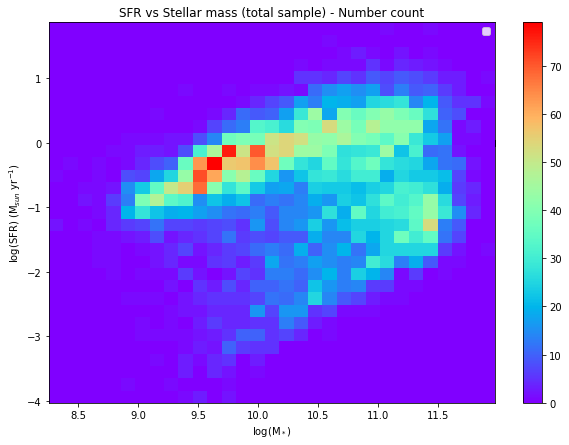

In [30]:
num_bin = 32

fig, ax = plt.subplots(figsize =(10, 7))
plt.title('SFR vs Stellar mass (total sample) - Number count')

x_min = mass.min()
x_max = mass.max()
  
y_min = sfr.min()
y_max = sfr.max()
print(x_min, x_max, y_min, y_max)

x_bins = np.linspace(x_min, x_max, num_bin)
y_bins = np.linspace(y_min, y_max, num_bin)
  

denominator, xedges, yedges = np.histogram2d(mass,sfr,bins=[x_bins, y_bins])

#print(denominator)
#print('xedges = ' + str(xedges))
#print('yedges =' + str(yedges))

plt.scatter(mass, 2.97 - 0.22*13.5 - np.log10(1+ ((10**(11.06 - 0.12*13.5))/10**mass)), color = 'black')

X, Y = np.meshgrid(xedges, yedges)
#plt.hist2d(mass, sfr, bins =[x_bins, y_bins], cmap = plt.cm.rainbow)
plt.pcolormesh(X, Y, denominator.T, cmap = plt.cm.rainbow)
#plt.scatter(etg_mass, etg_sfr, s = 5, label = 'ETG')
#plt.scatter(ltg_mass, ltg_sfr, s = 5, label = 'LTG')
#plt.vlines(xedges, -4,2, color = 'black')
#plt.hlines(yedges, 8.25,12, color = 'black')
#plt.xlim(8.2,12.2)
#plt.ylim(-4,1.75)
plt.legend()

plt.colorbar()


plt.xlabel(r'log(M$_*$)')
plt.ylabel(r'log(SFR) (M$_{sun}$ yr$^{-1}$)')

print(xedges[1] - xedges[2])
print(xedges[2] - xedges[3])

In [91]:
def weighted_mean(data, weights=None):
    """Calculate the weighted mean of a list."""
    if weights is None:
        return np.ma.mean(data)
    total_weight = float(sum(weights))
    weights = [weight / total_weight for weight in weights]
    w_mean = 0
    for i, weight in enumerate(weights):
        if np.ma.isMaskedArray(data[i]) == False:
            w_mean += weight * data[i]
    return w_mean

## Function to bin and find weighted median of different properties

In [92]:
array_size = (num_bin -1, num_bin -1)

#median, weighted median and mean 
wmed_lambda_array = np.full(array_size, np.nan)
med_lambda_array = np.full(array_size, np.nan)
wmean_lambda_array = np.full(array_size, np.nan)
ws_wmed_lambda_array = np.full(array_size, np.nan)

#deprojected lambda weighted median and mean
wmed_lambda_deproj_array = np.full(array_size, np.nan)
wmean_lambda_deproj_array = np.full(array_size, np.nan)

#ttype median and mean
wmed_ttype_array = np.full(array_size, np.nan)
wmean_ttype_array = np.full(array_size, np.nan)
for i in range(0,num_bin-1):
    for j in range(0,num_bin-1):
        data_cond = data[np.logical_and(np.logical_and(data['col12'] > yedges[i], data['col12'] < yedges[i+1]), np.logical_and(data['col10'] > xedges[j], data['col10'] < xedges[j+1]))]
        data_cond_sfr = data_cond['col12']
        data_cond_weight = data_cond['ESWEIGHT']
        data_cond_lambda = data_cond['Lambda_Re']
        data_cond_lambda_deproj = data_cond['lambda_deproj']
        data_cond_ttype = data_cond['T-Type'] 
        if len(data_cond_lambda) > 2:
            #1D arrays of values over which median is taken
            weighted_median_lambda = wq.median(data_cond_lambda, data_cond_weight)
            median_lambda = np.ma.median(data_cond_lambda)
            ws_weighted_median_lambda = ws.numpy_weighted_median(data_cond_lambda, weights = data_cond_weight)
            weighted_median_lambda_deproj = wq.median(data_cond_lambda_deproj, data_cond_weight)
            
            #1D arrays of values over which mean is taken
            weighted_mean_lambda = weighted_mean(data_cond_lambda, weights = data_cond_weight)
            weighted_mean_lambda_deproj = weighted_mean(data_cond_lambda_deproj, weights = data_cond_weight)
            
            #2D arrays
            wmed_lambda_array[i,j] = weighted_median_lambda
            med_lambda_array[i,j] = median_lambda
            wmean_lambda_array[i,j] = weighted_mean_lambda
            ws_wmed_lambda_array[i,j] = ws_weighted_median_lambda
            
            wmed_lambda_deproj_array[i,j] = weighted_median_lambda_deproj
            wmean_lambda_deproj_array[i,j] = weighted_mean_lambda_deproj
            
        if len(data_cond_ttype) > 2:
            #1D arrays of values over which median is taken
            median_ttype =  wq.median(data_cond_ttype, data_cond_weight)
            
            #1D arrays of values over which mean is taken
            weighted_mean_ttype = ws.numpy_weighted_mean(data_cond_ttype, weights = data_cond_weight)
            
            #2D arrays
            wmed_ttype_array[i,j] = median_ttype
            wmean_ttype_array[i,j] = weighted_mean_ttype
        
        
        

## 2D Histogram of ttype

In [128]:
"""
fig, ax = plt.subplots(figsize =(10, 7))
plt.title('SFR vs Stellar mass (total sample) with weighted median ttype')
"""
x_min = mass.min()
x_max = mass.max()
  
y_min = sfr.min()
y_max = sfr.max()
print(x_min, x_max, y_min, y_max)

x_bins = np.linspace(x_min, x_max, 16)
y_bins = np.linspace(y_min, y_max, 16)
"""

X, Y2 = np.meshgrid(xedges, yedges)
#plt.hist2d(mass, sfr, bins =[x_bins, y_bins], cmap = plt.cm.rainbow)

plt.pcolormesh(X, Y, wmed_ttype_array, cmap = plt.cm.rainbow.reversed())
#plt.scatter(etg_mass, etg_sfr, s = 5, label = 'ETG')
#plt.scatter(ltg_mass, ltg_sfr, s = 5, label = 'LTG')

#plt.xlim(8.2,12.2)
#plt.ylim(-4,1.75)
plt.legend()

plt.colorbar()

plt.scatter(mass, 2.97 - 0.22*13.5 - np.log10(1+ ((10**(11.06 - 0.12*13.5))/10**mass)), color = 'black', s = 0.5)


plt.xlabel(r'log(M$_*$)')
plt.ylabel(r'log(SFR) (M$_{sun}$ yr$^{-1}$)')
"""

8.255 11.975 -4.032 1.866


"\n\nX, Y2 = np.meshgrid(xedges, yedges)\n#plt.hist2d(mass, sfr, bins =[x_bins, y_bins], cmap = plt.cm.rainbow)\n\nplt.pcolormesh(X, Y, wmed_ttype_array, cmap = plt.cm.rainbow.reversed())\n#plt.scatter(etg_mass, etg_sfr, s = 5, label = 'ETG')\n#plt.scatter(ltg_mass, ltg_sfr, s = 5, label = 'LTG')\n\n#plt.xlim(8.2,12.2)\n#plt.ylim(-4,1.75)\nplt.legend()\n\nplt.colorbar()\n\nplt.scatter(mass, 2.97 - 0.22*13.5 - np.log10(1+ ((10**(11.06 - 0.12*13.5))/10**mass)), color = 'black', s = 0.5)\n\n\nplt.xlabel(r'log(M$_*$)')\nplt.ylabel(r'log(SFR) (M$_{sun}$ yr$^{-1}$)')\n"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'log(SFR) (M$_{sun}$ yr$^{-1}$)')

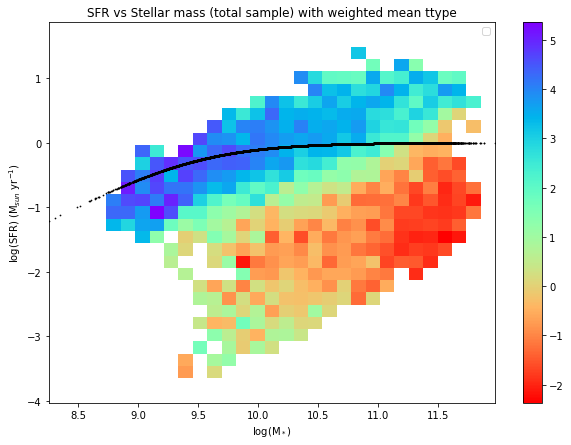

In [94]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.title('SFR vs Stellar mass (total sample) with weighted mean ttype')


X, Y = np.meshgrid(xedges, yedges)
#plt.hist2d(mass, sfr, bins =[x_bins, y_bins], cmap = plt.cm.rainbow)
plt.pcolormesh(X, Y, wmean_ttype_array, cmap = plt.cm.rainbow.reversed())
#plt.scatter(etg_mass, etg_sfr, s = 5, label = 'ETG')
#plt.scatter(ltg_mass, ltg_sfr, s = 5, label = 'LTG')

#plt.xlim(8.2,12.2)
#plt.ylim(-4,1.75)
plt.legend()

plt.colorbar()

plt.scatter(mass, 2.97 - 0.22*13.5 - np.log10(1+ ((10**(11.06 - 0.12*13.5))/10**mass)), color = 'black', s = 0.5)

plt.xlabel(r'log(M$_*$)')
plt.ylabel(r'log(SFR) (M$_{sun}$ yr$^{-1}$)')

## 2D Histogram of lambda parameter

In [130]:
"""
fig, ax = plt.subplots(figsize =(10, 7))
plt.title('SFR vs Stellar mass (total sample) with unweighted median lambda')



X, Y = np.meshgrid(xedges, yedges)
#plt.hist2d(mass, sfr, bins =[x_bins, y_bins], cmap = plt.cm.rainbow)
plt.pcolormesh(X, Y, med_lambda_array, cmap = plt.cm.viridis.reversed())
#plt.scatter(etg_mass, etg_sfr, s = 5, label = 'ETG')
#plt.scatter(ltg_mass, ltg_sfr, s = 5, label = 'LTG')

#plt.xlim(8.2,12.2)
#plt.ylim(-4,1.75)
plt.legend()

plt.colorbar()
plt.hlines(0.34393551, 9,11, color = 'red')
plt.hlines(0.15367744, 9,11, color = 'red')
plt.vlines(10.29500026, -4,1, color = 'red')
plt.vlines(10.41, -4,1, color = 'red')
plt.scatter(mass, 2.97 - 0.22*13.5 - np.log10(1+ ((10**(11.06 - 0.12*13.5))/10**mass)), color = 'black', s = 0.5)

plt.xlabel(r'log(M$_*$)')
plt.ylabel(r'log(SFR) (M$_{sun}$ yr$^{-1}$)')
"""

"\nfig, ax = plt.subplots(figsize =(10, 7))\nplt.title('SFR vs Stellar mass (total sample) with unweighted median lambda')\n\n\n\nX, Y = np.meshgrid(xedges, yedges)\n#plt.hist2d(mass, sfr, bins =[x_bins, y_bins], cmap = plt.cm.rainbow)\nplt.pcolormesh(X, Y, med_lambda_array, cmap = plt.cm.viridis.reversed())\n#plt.scatter(etg_mass, etg_sfr, s = 5, label = 'ETG')\n#plt.scatter(ltg_mass, ltg_sfr, s = 5, label = 'LTG')\n\n#plt.xlim(8.2,12.2)\n#plt.ylim(-4,1.75)\nplt.legend()\n\nplt.colorbar()\nplt.hlines(0.34393551, 9,11, color = 'red')\nplt.hlines(0.15367744, 9,11, color = 'red')\nplt.vlines(10.29500026, -4,1, color = 'red')\nplt.vlines(10.41, -4,1, color = 'red')\nplt.scatter(mass, 2.97 - 0.22*13.5 - np.log10(1+ ((10**(11.06 - 0.12*13.5))/10**mass)), color = 'black', s = 0.5)\n\nplt.xlabel(r'log(M$_*$)')\nplt.ylabel(r'log(SFR) (M$_{sun}$ yr$^{-1}$)')\n"

In [96]:
data[np.logical_and(np.logical_and(data['col12'] > 0.15367744, data['col12'] < 0.34393551), np.logical_and(data['col10'] > 10.29500026, data['col10'] < 10.41500027))][17]



CATALOG_RA,CATALOG_DEC,NSA_Z,NSA_ZDIST,NSA_ELPETRO_MASS,NSA_ELPETRO_ABSMAG [7],NSA_ELPETRO_AMIVAR [7],NSA_ELPETRO_FLUX [7],NSA_ELPETRO_FLUX_IVAR [7],NSA_ELPETRO_TH50_R,NSA_ELPETRO_TH50 [7],NSA_ELPETRO_PHI,NSA_ELPETRO_BA,NSA_SERSIC_MASS,NSA_SERSIC_ABSMAG [7],NSA_SERSIC_AMIVAR [7],NSA_SERSIC_FLUX [7],NSA_SERSIC_FLUX_IVAR [7],NSA_SERSIC_TH50,NSA_SERSIC_PHI,NSA_SERSIC_BA,NSA_SERSIC_N,NSA_PETRO_FLUX [7],NSA_PETRO_FLUX_IVAR [7],NSA_PETRO_TH50,NSA_EXTINCTION [7],NSA_IAUNAME,NSA_SUBDIR,NSA_PID,NSA_NSAID_1,CATIND,MANGA_TARGET1,MANGAID_1,ZMIN,ZMAX,SZMIN,SZMAX,EZMIN,EZMAX,PROBS,PWEIGHT,SWEIGHT,SRWEIGHT,EWEIGHT,PSRWEIGHT,ESRWEIGHT,PSWEIGHT,ESWEIGHT,RANFLAG,MANGA_TILEIDS [30],MANGA_TILEID,TILERA,TILEDEC,IFUTARGETSIZE,IFUDESIGNSIZE,IFUDESIGNWRONGSIZE,IFU_RA,IFU_DEC,BADPHOTFLAG,STARFLAG,OBJECT_RA,OBJECT_DEC,OBSFLAG,CATINDANC,IFUDESIGNSIZEMAIN,IFUMINSIZEANC,IFUTARGSIZEANC,MANGA_TARGET3,PRIORITYANC,UNALLOC,name,plate,ifudsgn,plateifu_1,mangaid_2,objra,objdec,log_SFR_Ha,FoV,Re_kpc,e_log_Mass,e_log_SFR_Ha,log_Mass,log_SFR_ssp,log_NII_Ha_cen,e_log_NII_Ha_cen,log_OIII_Hb_cen,e_log_OIII_Hb_cen,log_SII_Ha_cen,e_log_SII_Ha_cen,log_OII_Hb_cen,e_log_OII_Hb_cen,EW_Ha_cen,e_EW_Ha_cen,ZH_LW_Re_fit,e_ZH_LW_Re_fit,alpha_ZH_LW_Re_fit,e_alpha_ZH_LW_Re_fit,ZH_MW_Re_fit,e_ZH_MW_Re_fit,alpha_ZH_MW_Re_fit,e_alpha_ZH_MW_Re_fit,Age_LW_Re_fit,e_Age_LW_Re_fit,alpha_Age_LW_Re_fit,e_alpha_Age_LW_Re_fit,Age_MW_Re_fit,e_Age_MW_Re_fit,alpha_Age_MW_Re_fit,e_alpha_Age_MW_Re_fit,Re_arc,DL,DA,PA,ellip,log_Mass_gas,vel_sigma_Re,e_vel_sigma_Re,log_SFR_SF,log_SFR_D_C,OH_O3N2_cen,e_OH_O3N2_cen,OH_N2_cen,e_OH_N2_cen,OH_ONS_cen,e_OH_ONS_cen,OH_R23_cen,e_OH_R23_cen,OH_pyqz_cen,e_OH_pyqz_cen,OH_t2_cen,e_OH_t2_cen,OH_M08_cen,e_OH_M08_cen,OH_T04_cen,e_OH_T04_cen,OH_dop_cen,e_OH_dop_cen,OH_O3N2_EPM09_cen,e_OH_O3N2_EPM09_cen,log_OI_Ha_cen,e_log_OI_Ha_cen,Ha_Hb_cen,e_Ha_Hb_cen,log_NII_Ha_Re,e_log_NII_Ha_Re,log_OIII_Hb_Re,e_log_OIII_Hb_Re,log_SII_Ha_Re,e_log_SII_Ha_Re,log_OII_Hb_Re,e_log_OII_Hb_Re,log_OI_Ha_Re,e_log_OI_Ha_Re,EW_Ha_Re,e_EW_Ha_Re,Ha_Hb_Re,e_Ha_Hb_Re,log_NII_Ha_ALL,e_log_NII_Ha_ALL,log_OIII_Hb_ALL,e_log_OIII_Hb_ALL,log_SII_Ha_ALL,e_log_SII_Ha_ALL,log_OII_Hb_ALL,e_log_OII_Hb_ALL,log_OI_Ha_ALL,e_log_OI_Ha_ALL,EW_Ha_ALL,e_EW_Ha_ALL,Ha_Hb_ALL,Sigma_Mass_cen,e_Sigma_Mass_cen,Sigma_Mass_Re,e_Sigma_Mass_Re,Sigma_Mass_ALL,e_Sigma_Mass_ALL,T30,ZH_T30,ZH_Re_T30,a_ZH_T30,T40,ZH_T40,ZH_Re_T40,a_ZH_T40,T50,ZH_T50,ZH_Re_T50,a_ZH_T50,T60,ZH_T60,ZH_Re_T60,a_ZH_T60,T70,ZH_T70,ZH_Re_T70,a_ZH_T70,T80,ZH_T80,ZH_Re_T80,a_ZH_T80,T90,ZH_T90,ZH_Re_T90,a_ZH_T90,T95,ZH_T95,ZH_Re_T95,a_ZH_T95,T99,ZH_T99,ZH_Re_T99,a_ZH_T99,log_Mass_gas_Av_gas_OH,log_Mass_gas_Av_ssp_OH,vel_ssp_2,e_vel_ssp_2,vel_Ha_2,e_vel_Ha_2,vel_ssp_1,e_vel_ssp_1,vel_Ha_1,e_vel_Ha_1,log_SFR_ssp_100Myr,log_SFR_ssp_10Myr,vel_disp_Ha_cen,vel_disp_ssp_cen,vel_disp_Ha_1Re,vel_disp_ssp_1Re,log_Mass_in_Re,ML_int,ML_avg,F_Ha_cen,e_F_Ha_cen,R50_kpc_V,e_R50_kpc_V,R50_kpc_Mass,e_R50_kpc_Mass,log_Mass_corr_in_R50_V,e_log_Mass_corr_in_R50_V,log_Mass_gas_Av_gas_log_log,Av_gas_Re,e_Av_gas_Re,Av_ssp_Re,e_Av_ssp_Re,Lambda_Re,e_Lambda_Re,nsa_redshift,nsa_mstar,nsa_inclination,flux_[OII]3726.03_Re_fit,e_flux_[OII]3726.03_Re_fit,flux_[OII]3726.03_alpha_fit,e_flux_[OII]3726.03_alpha_fit,flux_[OII]3728.82_Re_fit,e_flux_[OII]3728.82_Re_fit,flux_[OII]3728.82_alpha_fit,e_flux_[OII]3728.82_alpha_fit,flux_HI3734.37_Re_fit,e_flux_HI3734.37_Re_fit,flux_HI3734.37_alpha_fit,e_flux_HI3734.37_alpha_fit,flux_HI3797.9_Re_fit,e_flux_HI3797.9_Re_fit,flux_HI3797.9_alpha_fit,e_flux_HI3797.9_alpha_fit,flux_HeI3888.65_Re_fit,e_flux_HeI3888.65_Re_fit,flux_HeI3888.65_alpha_fit,e_flux_HeI3888.65_alpha_fit,flux_HI3889.05_Re_fit,e_flux_HI3889.05_Re_fit,flux_HI3889.05_alpha_fit,e_flux_HI3889.05_alpha_fit,flux_HeI3964.73_Re_fit,e_flux_HeI3964.73_Re_fit,flux_HeI3964.73_alpha_fit,e_flux_HeI3964.73_alpha_fit,flux_[NeIII]3967.46_Re_fit,e_flux_[NeIII]3967.46_Re_fit,flux_[NeIII]3967.46_alpha_fit,e_flux_[NeIII]3967.46_alpha_fit,flux_CaII3968.47_Re_fit,e_flux_CaII3968.47_Re_fit,flux_CaII396

In [97]:
exam1 = data[np.logical_and(np.logical_and(data['col12'] > 0.15367744, data['col12'] < 0.34393551), np.logical_and(data['col10'] > 10.29500026, data['col10'] < 10.41500027))]['Lambda_Re']
#np.median(exam1)
for i in range(0,len(exam1)):
    print(exam1[i])
    
exam1[17]

0.833836150552732
0.918358126866516
0.80646245288795
0.837383837397636
0.678898885371092
0.951961616474913
0.715082501405075
0.699206773573511
0.82675293299395
0.940048535679154
0.774882256322565
0.956185156294004
0.871967045073132
0.669959682614322
0.962769244702985
0.925020071541407
0.796922742462576
--
0.720227129765076
0.91996938960394
0.93575328593216
0.943888066360756
0.678004690741886
0.664304363649852
0.909632149414846
0.680549175501295
0.784413236295209
0.91962000555794
0.962191885958469
0.828586776236316
0.644800673468923
0.974973971399731
0.831225576129805
0.823228954758349
0.864817737383123
0.916157910658643
0.797252456282006
0.518783672724544
0.960567669427592


masked

In [111]:
"""
fig, ax = plt.subplots(figsize =(10, 7))
plt.title('SFR vs Stellar mass (total sample) with weighted median lambda')

    

X, Y = np.meshgrid(xedges, yedges)
#plt.hist2d(mass, sfr, bins =[x_bins, y_bins], cmap = plt.cm.rainbow)
plt.pcolormesh(X, Y, wmed_lambda_array, cmap = plt.cm.rainbow.reversed(), vmin = 0.1, vmax = 0.9)
#plt.scatter(etg_mass, etg_sfr, s = 5, label = 'ETG')
#plt.scatter(ltg_mass, ltg_sfr, s = 5, label = 'LTG')
#plt.scatter(mass, 2.97 - 0.22*13.5 - np.log10(1+ ((10**(11.06 - 0.12*13.5))/10**mass)), color = 'black', s = 0.5)
#plt.xlim(8.2,12.2)
#plt.ylim(-4,1.75)
plt.legend()

plt.colorbar()

plt.scatter(mass, 2.97 - 0.22*13.5 - np.log10(1+ ((10**(11.06 - 0.12*13.5))/10**mass)), color = 'black', s = 0.5)

plt.xlabel(r'log(M$_*$)')
plt.ylabel(r'log(SFR) (M$_{sun}$ yr$^{-1}$)')
"""

"\nfig, ax = plt.subplots(figsize =(10, 7))\nplt.title('SFR vs Stellar mass (total sample) with weighted median lambda')\n\n    \n\nX, Y = np.meshgrid(xedges, yedges)\n#plt.hist2d(mass, sfr, bins =[x_bins, y_bins], cmap = plt.cm.rainbow)\nplt.pcolormesh(X, Y, wmed_lambda_array, cmap = plt.cm.rainbow.reversed(), vmin = 0.1, vmax = 0.9)\n#plt.scatter(etg_mass, etg_sfr, s = 5, label = 'ETG')\n#plt.scatter(ltg_mass, ltg_sfr, s = 5, label = 'LTG')\n#plt.scatter(mass, 2.97 - 0.22*13.5 - np.log10(1+ ((10**(11.06 - 0.12*13.5))/10**mass)), color = 'black', s = 0.5)\n#plt.xlim(8.2,12.2)\n#plt.ylim(-4,1.75)\nplt.legend()\n\nplt.colorbar()\n\nplt.scatter(mass, 2.97 - 0.22*13.5 - np.log10(1+ ((10**(11.06 - 0.12*13.5))/10**mass)), color = 'black', s = 0.5)\n\nplt.xlabel(r'log(M$_*$)')\nplt.ylabel(r'log(SFR) (M$_{sun}$ yr$^{-1}$)')\n"

In [110]:
"""
fig, ax = plt.subplots(figsize =(10, 7))
plt.title('SFR vs Stellar mass (total sample) with weighted median lambda')




X, Y = np.meshgrid(xedges, yedges)
#plt.hist2d(mass, sfr, bins =[x_bins, y_bins], cmap = plt.cm.rainbow)
plt.pcolormesh(X, Y, ws_wmed_lambda_array, cmap = plt.cm.rainbow.reversed(), vmin = 0.1, vmax = 0.9)
#plt.scatter(etg_mass, etg_sfr, s = 5, label = 'ETG')
#plt.scatter(ltg_mass, ltg_sfr, s = 5, label = 'LTG')

#plt.xlim(8.2,12.2)
#plt.ylim(-4,1.75)
plt.legend()

plt.colorbar()
plt.scatter(mass, 2.97 - 0.22*13.5 - np.log10(1+ ((10**(11.06 - 0.12*13.5))/10**mass)), color = 'black', s = 0.5)

plt.xlabel(r'log(M$_*$)')
plt.ylabel(r'log(SFR) (M$_{sun}$ yr$^{-1}$)')
"""

"\nfig, ax = plt.subplots(figsize =(10, 7))\nplt.title('SFR vs Stellar mass (total sample) with weighted median lambda')\n\n\n\n\nX, Y = np.meshgrid(xedges, yedges)\n#plt.hist2d(mass, sfr, bins =[x_bins, y_bins], cmap = plt.cm.rainbow)\nplt.pcolormesh(X, Y, ws_wmed_lambda_array, cmap = plt.cm.rainbow.reversed(), vmin = 0.1, vmax = 0.9)\n#plt.scatter(etg_mass, etg_sfr, s = 5, label = 'ETG')\n#plt.scatter(ltg_mass, ltg_sfr, s = 5, label = 'LTG')\n\n#plt.xlim(8.2,12.2)\n#plt.ylim(-4,1.75)\nplt.legend()\n\nplt.colorbar()\nplt.scatter(mass, 2.97 - 0.22*13.5 - np.log10(1+ ((10**(11.06 - 0.12*13.5))/10**mass)), color = 'black', s = 0.5)\n\nplt.xlabel(r'log(M$_*$)')\nplt.ylabel(r'log(SFR) (M$_{sun}$ yr$^{-1}$)')\n"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'log(SFR) (M$_{sun}$ yr$^{-1}$)')

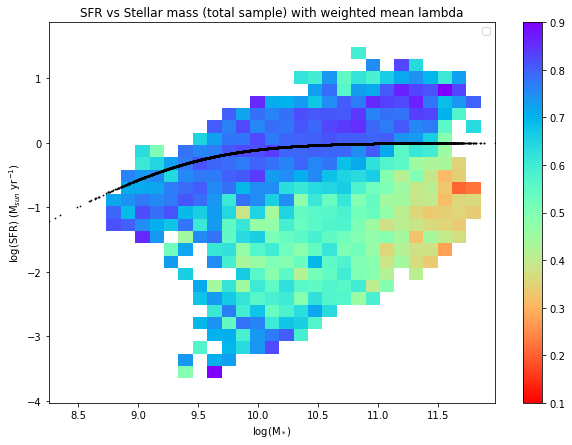

In [100]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.title('SFR vs Stellar mass (total sample) with weighted mean lambda')



X, Y = np.meshgrid(xedges, yedges)
#plt.hist2d(mass, sfr, bins =[x_bins, y_bins], cmap = plt.cm.rainbow)
plt.pcolormesh(X, Y, wmean_lambda_array, cmap = plt.cm.rainbow.reversed(), vmin = 0.1, vmax = 0.9)
#plt.scatter(etg_mass, etg_sfr, s = 5, label = 'ETG')
#plt.scatter(ltg_mass, ltg_sfr, s = 5, label = 'LTG')
#plt.scatter(mass, 2.97 - 0.22*13.5 - np.log10(1+ ((10**(11.06 - 0.12*13.5))/10**mass)), color = 'black', s = 0.5)
#plt.xlim(8.2,12.2)
#plt.ylim(-4,1.75)
plt.legend()

plt.colorbar()

plt.scatter(mass, 2.97 - 0.22*13.5 - np.log10(1+ ((10**(11.06 - 0.12*13.5))/10**mass)), color = 'black', s = 0.5)

plt.xlabel(r'log(M$_*$)')
plt.ylabel(r'log(SFR) (M$_{sun}$ yr$^{-1}$)')

# 2D Histogram of deprojected Lambda

In [109]:
"""
fig, ax = plt.subplots(figsize =(10, 7))
plt.title('SFR vs Stellar mass (total sample) with weighted median lambda (deprojected)')

    

X, Y = np.meshgrid(xedges, yedges)
#plt.hist2d(mass, sfr, bins =[x_bins, y_bins], cmap = plt.cm.rainbow)
plt.pcolormesh(X, Y, wmed_lambda_deproj_array, cmap = plt.cm.rainbow.reversed(), vmin = 0.1, vmax = 0.9)
#plt.scatter(etg_mass, etg_sfr, s = 5, label = 'ETG')
#plt.scatter(ltg_mass, ltg_sfr, s = 5, label = 'LTG')
#plt.scatter(mass, 2.97 - 0.22*13.5 - np.log10(1+ ((10**(11.06 - 0.12*13.5))/10**mass)), color = 'black', s = 0.5)
#plt.xlim(8.2,12.2)
#plt.ylim(-4,1.75)
plt.legend()

plt.colorbar()

plt.scatter(mass, 2.97 - 0.22*13.5 - np.log10(1+ ((10**(11.06 - 0.12*13.5))/10**mass)), color = 'black', s = 0.5)

plt.xlabel(r'log(M$_*$)')
plt.ylabel(r'log(SFR) (M$_{sun}$ yr$^{-1}$)')
"""

"\nfig, ax = plt.subplots(figsize =(10, 7))\nplt.title('SFR vs Stellar mass (total sample) with weighted median lambda (deprojected)')\n\n    \n\nX, Y = np.meshgrid(xedges, yedges)\n#plt.hist2d(mass, sfr, bins =[x_bins, y_bins], cmap = plt.cm.rainbow)\nplt.pcolormesh(X, Y, wmed_lambda_deproj_array, cmap = plt.cm.rainbow.reversed(), vmin = 0.1, vmax = 0.9)\n#plt.scatter(etg_mass, etg_sfr, s = 5, label = 'ETG')\n#plt.scatter(ltg_mass, ltg_sfr, s = 5, label = 'LTG')\n#plt.scatter(mass, 2.97 - 0.22*13.5 - np.log10(1+ ((10**(11.06 - 0.12*13.5))/10**mass)), color = 'black', s = 0.5)\n#plt.xlim(8.2,12.2)\n#plt.ylim(-4,1.75)\nplt.legend()\n\nplt.colorbar()\n\nplt.scatter(mass, 2.97 - 0.22*13.5 - np.log10(1+ ((10**(11.06 - 0.12*13.5))/10**mass)), color = 'black', s = 0.5)\n\nplt.xlabel(r'log(M$_*$)')\nplt.ylabel(r'log(SFR) (M$_{sun}$ yr$^{-1}$)')\n"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'log(SFR) (M$_{sun}$ yr$^{-1}$)')

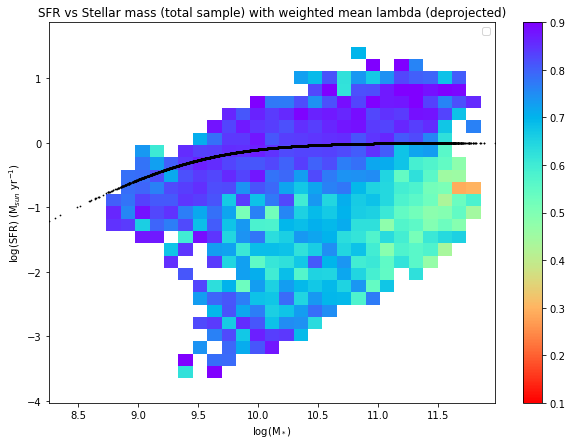

In [108]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.title('SFR vs Stellar mass (total sample) with weighted mean lambda (deprojected)')



X, Y = np.meshgrid(xedges, yedges)
#plt.hist2d(mass, sfr, bins =[x_bins, y_bins], cmap = plt.cm.rainbow)
plt.pcolormesh(X, Y, wmean_lambda_deproj_array, cmap = plt.cm.rainbow.reversed(), vmin = 0.1, vmax = 0.9)
#plt.scatter(etg_mass, etg_sfr, s = 5, label = 'ETG')
#plt.scatter(ltg_mass, ltg_sfr, s = 5, label = 'LTG')
#plt.scatter(mass, 2.97 - 0.22*13.5 - np.log10(1+ ((10**(11.06 - 0.12*13.5))/10**mass)), color = 'black', s = 0.5)
#plt.xlim(8.2,12.2)
#plt.ylim(-4,1.75)
plt.legend()

plt.colorbar()
#plt.hlines(0.34393551, 9,11, color = 'red')
#plt.hlines(0.15367744, 9,11, color = 'red')
#plt.vlines(11.01500031, -4,1, color = 'red')
#plt.vlines(11.13500032, -4,1, color = 'red')
plt.scatter(mass, 2.97 - 0.22*13.5 - np.log10(1+ ((10**(11.06 - 0.12*13.5))/10**mass)), color = 'black', s = 0.5)

plt.xlabel(r'log(M$_*$)')
plt.ylabel(r'log(SFR) (M$_{sun}$ yr$^{-1}$)')

#print(X[(X>10.8) & (X<11.5)])
#print(Y[(Y>0) & (Y<1)])

In [106]:
"""
data[np.logical_and(np.logical_and(data['col12'] > 0.15367744, data['col12'] < 0.34393551), np.logical_and(data['col10'] > 11.01500031, data['col10'] < 11.13500032))]
exam2 = data[np.logical_and(np.logical_and(data['col12'] > 0.15367744, data['col12'] < 0.34393551), np.logical_and(data['col10'] > 11.01500031, data['col10'] < 11.13500032))]['Lambda_Re']
exam2weight = data[np.logical_and(np.logical_and(data['col12'] > 0.15367744, data['col12'] < 0.34393551), np.logical_and(data['col10'] > 11.01500031, data['col10'] < 11.13500032))]['ESWEIGHT']

for i in range(0,len(exam2)):
    print(exam2[i])
    print(np.ma.isMaskedArray(exam2[i]))
#weighted_mean(exam2, exam2weight)
type(exam2[37])
"""

"\ndata[np.logical_and(np.logical_and(data['col12'] > 0.15367744, data['col12'] < 0.34393551), np.logical_and(data['col10'] > 11.01500031, data['col10'] < 11.13500032))]\nexam2 = data[np.logical_and(np.logical_and(data['col12'] > 0.15367744, data['col12'] < 0.34393551), np.logical_and(data['col10'] > 11.01500031, data['col10'] < 11.13500032))]['Lambda_Re']\nexam2weight = data[np.logical_and(np.logical_and(data['col12'] > 0.15367744, data['col12'] < 0.34393551), np.logical_and(data['col10'] > 11.01500031, data['col10'] < 11.13500032))]['ESWEIGHT']\n\nfor i in range(0,len(exam2)):\n    print(exam2[i])\n    print(np.ma.isMaskedArray(exam2[i]))\n#weighted_mean(exam2, exam2weight)\ntype(exam2[37])\n"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'log(SFR) (M$_{sun}$ yr$^{-1}$)')

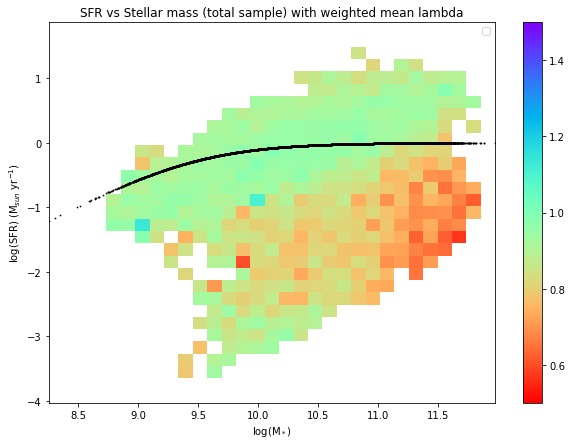

In [132]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.title('SFR vs Stellar mass (total sample) with weighted mean lambda')



X, Y = np.meshgrid(xedges, yedges)
#plt.hist2d(mass, sfr, bins =[x_bins, y_bins], cmap = plt.cm.rainbow)
plt.pcolormesh(X, Y, wmean_lambda_array/wmean_lambda_deproj_array, cmap = plt.cm.rainbow.reversed(), vmin = 0.5, vmax = 1.5)
#plt.scatter(etg_mass, etg_sfr, s = 5, label = 'ETG')
#plt.scatter(ltg_mass, ltg_sfr, s = 5, label = 'LTG')
#plt.scatter(mass, 2.97 - 0.22*13.5 - np.log10(1+ ((10**(11.06 - 0.12*13.5))/10**mass)), color = 'black', s = 0.5)
#plt.xlim(8.2,12.2)
#plt.ylim(-4,1.75)
plt.legend()

plt.colorbar()

plt.scatter(mass, 2.97 - 0.22*13.5 - np.log10(1+ ((10**(11.06 - 0.12*13.5))/10**mass)), color = 'black', s = 0.5)

plt.xlabel(r'log(M$_*$)')
plt.ylabel(r'log(SFR) (M$_{sun}$ yr$^{-1}$)')